In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

casino_data = pd.read_csv('/users/justindeangel/downloads/cleanedfile.csv')

casino_data.rename(columns={'guest id': 'guest_id'}, inplace=True)

# Defining the color palette
azure_blue = '#005f9e'  # A shade of deep sky blue
sandy_beige = '#C2B280' # A shade of beige
palm_green = '#3CB371'  # A shade of medium sea green
gold = '#FFD700'        # A shade of gold

casino_data

,guest_id,property,month,age_group,vip_group,location,frequency,rev_2020,rev_2019,cost_2020,cost_2019,tax_2020,tax_2019
0,7506951504,AzureOasis,10,c. 40-54 yrs,b. NonVIP <400,a. Local,Weekly,791.0,1383.0,78.38,208.25,245.21,428.73
1,9205494704,AzureOasis,10,c. 40-54 yrs,b. NonVIP <400,a. Local,Monthly,14.0,168.0,10.41,5.00,4.34,52.08
2,9203294222,AzureOasis,10,b. 55-74 yrs,b. NonVIP <400,a. Local,Weekly,1700.0,1348.0,222.81,271.02,527.00,417.88
3,9206333891,AzureOasis,10,b. 55-74 yrs,b. NonVIP <400,a. Local,Monthly,95.0,837.0,25.29,178.89,29.45,259.47
4,2104216560,AzureOasis,10,b. 55-74 yrs,a. VIP 400+,a. Local,Weekly,4796.0,3900.0,642.97,671.46,1486.76,1209.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,9205709741,AzureOasis,10,b. 55-74 yrs,b. NonVIP <400,a. Local,Weekly,20.0,591.0,16.46,93.96,6.20,183.21
8685,9203309036,AzureOasis,10,b. 55-74 yrs,b. NonVIP <400,a. Local,Weekly,289.0,278.0,16.46,0.00,89.59,86.18
8686,9204375758,AzureOasis,10,b. 55-74 yrs,b. NonVIP <400,a. Local,Weekly,1452.0,215.0,16.46,15.31,450.12,66.65
8687,9203437376,AzureOasis,10,c. 40-54 yrs,b. NonVIP <400,a. Local,Monthly,149.0,1.0,16.46,10.00,46.19,0.31


### Compute YoY Revenue, Cost, and Net Revenue for October

In [2]:
# Filter data for AzureOasis property and the month of October
oct_data = casino_data[(casino_data['property'] == 'AzureOasis') & (casino_data['month'] == 10)]

# Group by year and calculate sums
oct_data['year'] = np.where(oct_data['rev_2020'].notnull(), 2020, 2019)
yoy = oct_data.groupby('year').agg({
    'rev_2020': 'sum',
    'rev_2019': 'sum',
    'cost_2020': 'sum',
    'cost_2019': 'sum'
}).reset_index()

# Calculate net revenues and changes
yoy['net_revenue_2020'] = yoy['rev_2020'] - yoy['cost_2020']
yoy['net_revenue_2019'] = yoy['rev_2019'] - yoy['cost_2019']
yoy['yoy_revenue'] = yoy['rev_2020'] - yoy['rev_2019']
yoy['yoy_cost'] = yoy['cost_2020'] - yoy['cost_2019']
yoy['yoy_net_revenue'] = yoy['net_revenue_2020'] - yoy['net_revenue_2019']
yoy


,year,rev_2020,rev_2019,cost_2020,cost_2019,net_revenue_2020,net_revenue_2019,yoy_revenue,yoy_cost,yoy_net_revenue
0,2020,6307745.0,5897714.0,598760.26,804156.12,5708984.74,5093557.88,410031.0,-205395.86,615426.86


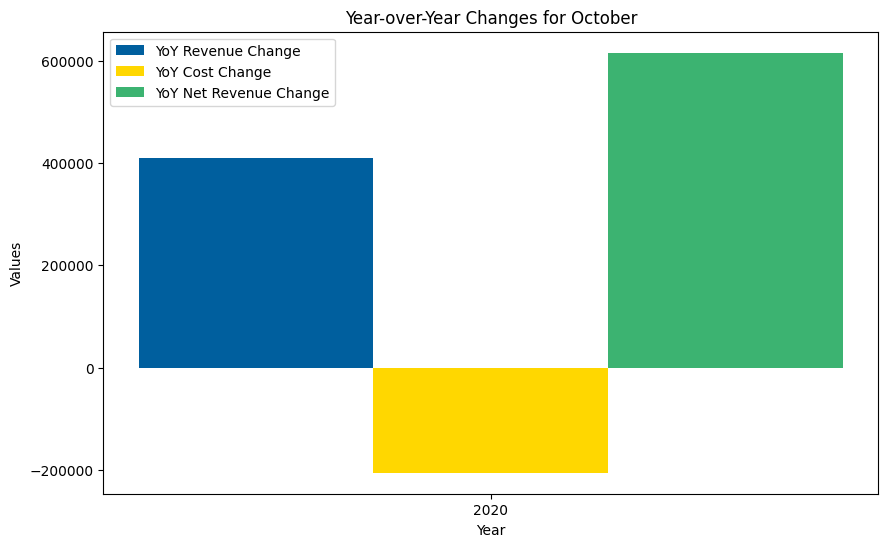

In [3]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Index for the bars
index = range(len(yoy))

# Creating bars for each year's metrics
bar1 = ax.bar(index, yoy['yoy_revenue'], bar_width, color=azure_blue, label='YoY Revenue Change')
bar2 = ax.bar([i + bar_width for i in index], yoy['yoy_cost'], bar_width, color=gold, label='YoY Cost Change')
bar3 = ax.bar([i + bar_width * 2 for i in index], yoy['yoy_net_revenue'], bar_width, color=palm_green, label='YoY Net Revenue Change')

# Labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Year-over-Year Changes for October')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(yoy['year'])
ax.legend()

# Show the plot
plt.show()


 ### VIP Guests Performance in October 2020 vs October 2019

In [4]:
# Filtering the data for VIP guests (vip_group = 'a. VIP 400+') in the month of October
vip_data = casino_data[(casino_data['vip_group'] == 'a. VIP 400+') & (casino_data['month'] == 10)]

# Aggregating the sum of revenues and costs for both years 2019 and 2020
# This will give us the total revenue and cost for VIP guests in October for each year
vip_performance = vip_data[['rev_2020', 'cost_2020', 'rev_2019', 'cost_2019']].sum()
vip_performance

rev_2020     1885055.00
cost_2020     225998.91
rev_2019     1947829.00
cost_2019     260122.48
dtype: float64

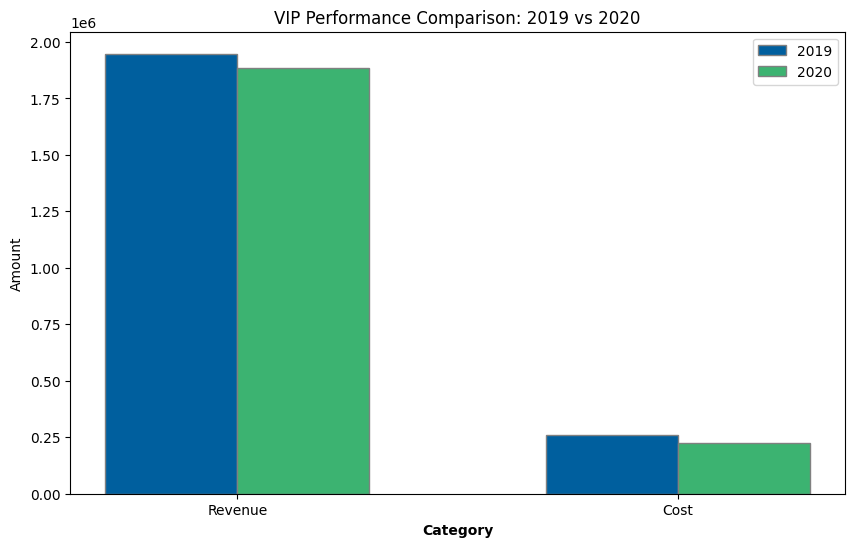

In [5]:
# Data preparation
categories = ['Revenue', 'Cost']
values_2019 = [vip_performance['rev_2019'], vip_performance['cost_2019']]
values_2020 = [vip_performance['rev_2020'], vip_performance['cost_2020']]

# Positions of the bars on the x-axis
barWidth = 0.3
r1 = range(len(categories))
r2 = [x + barWidth for x in r1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, values_2019, color=[azure_blue], width=barWidth, edgecolor='grey', label='2019')
plt.bar(r2, values_2020, color=[palm_green], width=barWidth, edgecolor='grey', label='2020')

# Adding labels and title
plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(categories))], categories)
plt.ylabel('Amount')
plt.title('VIP Performance Comparison: 2019 vs 2020')

# Creating a legend
plt.legend()

# Show the plot
plt.show()

### Average Cost per Guest for Weekly, Monthly, and Infrequent Guests

In [6]:
# Filter for guests with specific visit frequencies
avg_cost_data = casino_data[casino_data['frequency'].isin(['Weekly', 'Monthly', 'Infrequent'])]

# Aggregate total cost and unique guest count by frequency
avg_cost_per_guest = avg_cost_data.groupby('frequency').agg({
    'cost_2020': 'sum',
    'guest_id': pd.Series.nunique
})

# Calculate average cost per guest for 2020
avg_cost_per_guest['avg_cost_2020'] = avg_cost_per_guest['cost_2020'] / avg_cost_per_guest['guest_id']

# Sort by frequency: Weekly, Monthly, Infrequent
avg_cost_per_guest = avg_cost_per_guest.sort_values(by='frequency', key=lambda x: x.map({'Weekly': 1, 'Monthly': 2, 'Infrequent': 3}))
avg_cost_per_guest

,cost_2020,guest_id,avg_cost_2020
frequency,,,
Weekly,429062.85,3404,126.046666
Monthly,148812.46,3978,37.408864
Infrequent,20884.95,1307,15.979304


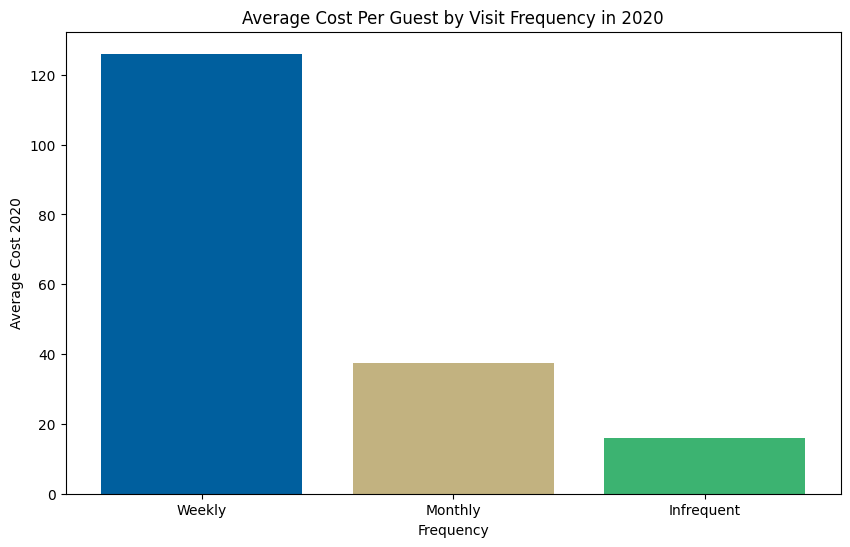

In [7]:
# Extracting data for the plot
frequencies = avg_cost_per_guest.index.tolist()
average_costs = avg_cost_per_guest['avg_cost_2020'].tolist()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(frequencies, average_costs, color=[azure_blue, sandy_beige, palm_green])

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Average Cost 2020')
plt.title('Average Cost Per Guest by Visit Frequency in 2020')

# Show the plot
plt.show()

### Local Guests who had no Incented Trips in October 2020

In [8]:
# Filter the dataset to identify local guests who had no incented trips in October 2020
# This is done by selecting records where:
# - the month is October (month == 10)
# - the cost for 2020 is zero (indicating no incented trips)
# - the location is marked as 'a. Local' (indicating local guests)
local_guests_no_incented_trips = casino_data[(casino_data['month'] == 10) & (casino_data['cost_2020'] == 0) & (casino_data['location'] == 'a. Local')]

# Calculate the total number of unique local guests without incented trips
# The 'nunique()' function counts the number of distinct guest IDs in the filtered data
total_local_guests = local_guests_no_incented_trips['guest_id'].nunique()


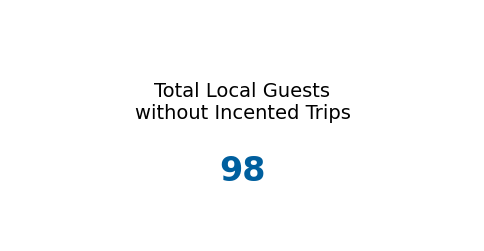

In [9]:
# Create figure
plt.figure(figsize=(6, 3))

# Create a text-based KPI visualization
plt.text(0.5, 0.6, 'Total Local Guests\nwithout Incented Trips', 
         horizontalalignment='center', 
         verticalalignment='center', 
         fontsize=14,)

plt.text(0.5, 0.3, f'{total_local_guests}', 
         horizontalalignment='center', 
         verticalalignment='center', 
         fontsize=24, 
         color=azure_blue, 
         fontweight='bold')

# Remove axes
plt.axis('off')

# Show the plot
plt.show()

### Property Performance and Guest Age Group Analysis

In [10]:
# Group the data by 'property' and 'age_group', then aggregate the total revenue for 2019 and 2020
property_age_analysis = casino_data.groupby(['property', 'age_group']).agg({
    'rev_2020': 'sum',
    'rev_2019': 'sum'
})

# Calculate the year-over-year revenue change from 2019 to 2020
property_age_analysis['revenue_change'] = property_age_analysis['rev_2020'] - property_age_analysis['rev_2019']


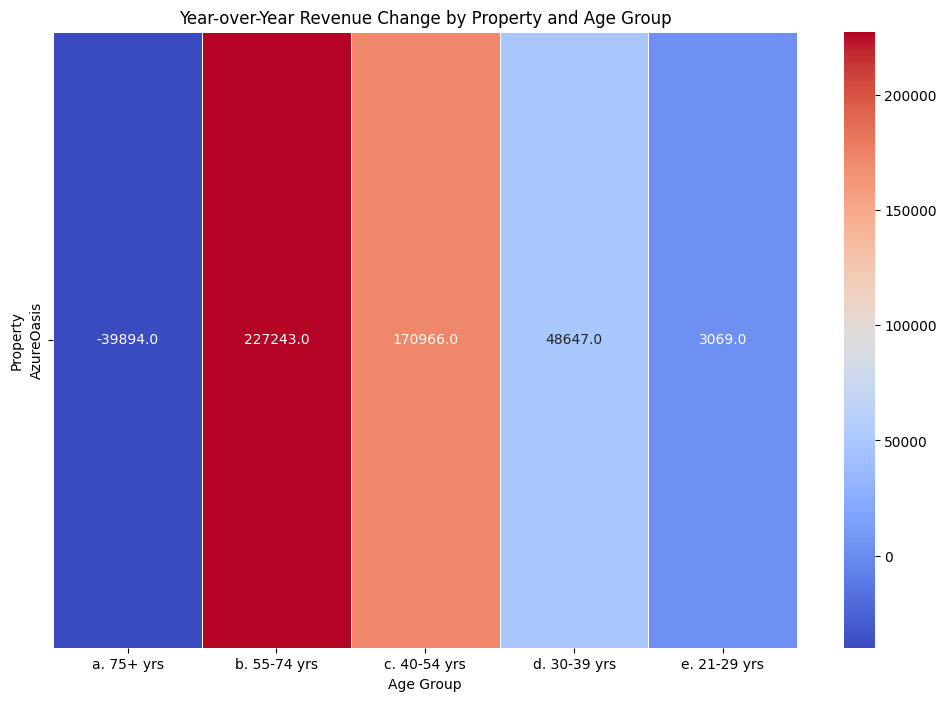

In [11]:
# Convert the DataFrame into a pivot table for the heatmap
pivot_data = property_age_analysis.reset_index().pivot(index='property', columns='age_group', values='revenue_change')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Property')
plt.title('Year-over-Year Revenue Change by Property and Age Group')

# Show the plot
plt.show()


### VIP Guest Revenue vs. Cost Efficiency

In [12]:
# Filter out records where vip_group is not empty
vip_efficiency = casino_data[casino_data['vip_group'] != '']

# Group data by vip_group and sum revenues and costs for 2019 and 2020
vip_efficiency = vip_efficiency.groupby('vip_group').agg({
    'rev_2020': 'sum',
    'cost_2020': 'sum',
    'rev_2019': 'sum',
    'cost_2019': 'sum'
})

# Calculate revenue-to-cost ratio for 2020, replacing any zero costs with NaN to avoid division by zero
vip_efficiency['revenue_cost_ratio_2020'] = vip_efficiency['rev_2020'] / vip_efficiency['cost_2020'].replace(0, np.nan)

# Calculate revenue-to-cost ratio for 2019, similar handling for zero costs
vip_efficiency['revenue_cost_ratio_2019'] = vip_efficiency['rev_2019'] / vip_efficiency['cost_2019'].replace(0, np.nan)

# Sort the DataFrame by revenue_cost_ratio_2020 in descending order
vip_efficiency.sort_values('revenue_cost_ratio_2020', ascending=False)

vip_efficiency

,rev_2020,cost_2020,rev_2019,cost_2019,revenue_cost_ratio_2020,revenue_cost_ratio_2019
vip_group,,,,,,
a. VIP 400+,1885055.0,225998.91,1947829.0,260122.48,8.340992,7.488123
b. NonVIP <400,4422690.0,372761.35,3949885.0,544033.64,11.864669,7.260369


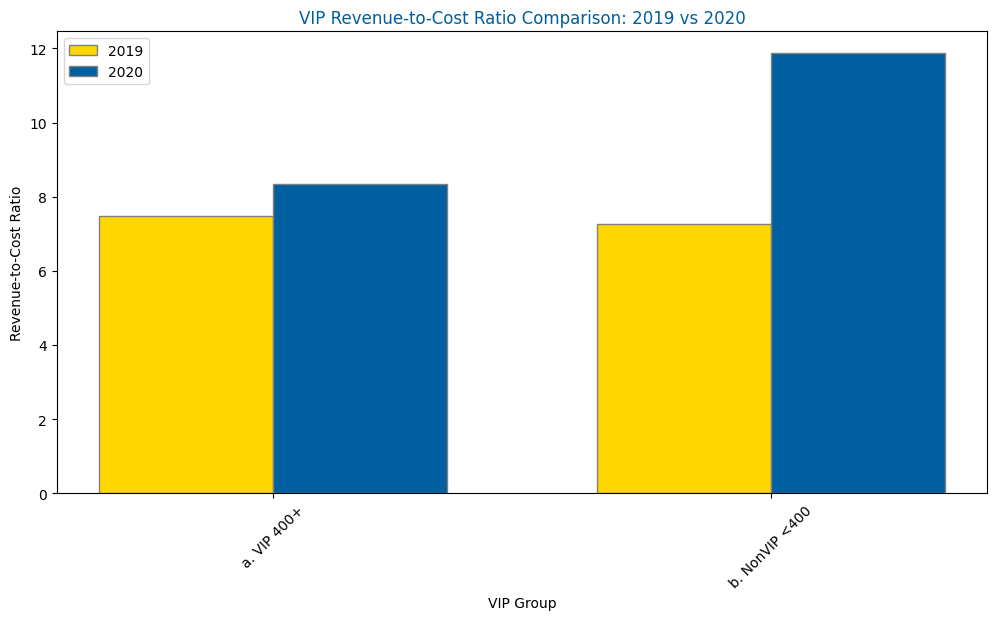

In [13]:
# Data preparation
vip_groups = vip_efficiency.index.tolist()
ratios_2019 = vip_efficiency['revenue_cost_ratio_2019'].tolist()
ratios_2020 = vip_efficiency['revenue_cost_ratio_2020'].tolist()

# Positions of the bars on the x-axis
bar_width = 0.35
r1 = range(len(vip_groups))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(r1, ratios_2019, color=gold, width=bar_width, edgecolor='grey', label='2019')
plt.bar(r2, ratios_2020, color=azure_blue, width=bar_width, edgecolor='grey', label='2020')

# Adding labels and title
plt.xlabel('VIP Group')
plt.ylabel('Revenue-to-Cost Ratio')
plt.title('VIP Revenue-to-Cost Ratio Comparison: 2019 vs 2020', color=azure_blue)
plt.xticks([r + bar_width / 2 for r in range(len(vip_groups))], vip_groups, rotation=45)

# Creating a legend
plt.legend()

# Show the plot
plt.show()

### Cost Trend Analysis by Guest Frequency

In [14]:
# Grouping the 'casino_data' DataFrame by the 'frequency' column and applying aggregation functions to specific columns.
cost_trend = casino_data.groupby('frequency').agg({
    'guest_id': pd.Series.nunique,  # Count the unique values in 'guest_id' for each group
    'cost_2020': 'mean',           # Calculate the mean of 'cost_2020' for each group
    'cost_2019': 'mean'            # Calculate the mean of 'cost_2019' for each group
})

# Calculating the difference between the mean cost in 2020 and 2019 for each group.
cost_trend['average_cost_change'] = cost_trend['cost_2020'] - cost_trend['cost_2019']

# Sorting the 'cost_trend' DataFrame based on the 'average_cost_change' column in descending order.
cost_trend = cost_trend.sort_values('average_cost_change', ascending=False)
cost_trend


,guest_id,cost_2020,cost_2019,average_cost_change
frequency,,,,
Infrequent,1307,21.074622,22.934969,-1.860347
Monthly,3978,42.288281,56.213828,-13.925547
Weekly,3404,132.919099,174.186878,-41.267780


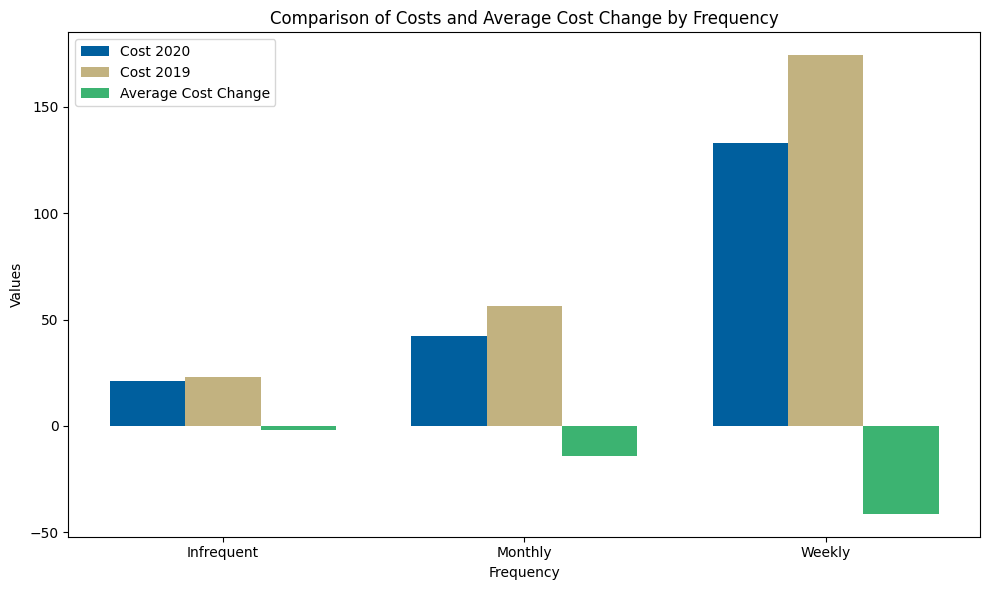

In [15]:
# Extract the data from the 'cost_trend' DataFrame
frequency = cost_trend.index
cost_2020 = cost_trend['cost_2020']
cost_2019 = cost_trend['cost_2019']
average_cost_change = cost_trend['average_cost_change']

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(frequency))

# Create grouped bar plots for each category
plt.figure(figsize=(10, 6))

plt.bar(index - bar_width, cost_2020, bar_width, color=azure_blue, label='Cost 2020')
plt.bar(index, cost_2019, bar_width, color=sandy_beige, label='Cost 2019')
plt.bar(index + bar_width, average_cost_change, bar_width, color=palm_green, label='Average Cost Change')

plt.xlabel('Frequency')
plt.ylabel('Values')
plt.title('Comparison of Costs and Average Cost Change by Frequency')
plt.xticks(index, frequency)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

###  Top 7 Guest Segments by Cost-to-Revenue Ratio

In [16]:
# Grouping the 'casino_data' DataFrame by multiple columns (age_group, vip_group, location, frequency) 
# and applying aggregation functions to specific columns.
guest_segments = casino_data.groupby(['age_group', 'vip_group', 'location', 'frequency']).agg({
    'rev_2020': 'sum',       # Calculate the sum of revenue in 2020 for each group
    'rev_2019': 'sum',       # Calculate the sum of revenue in 2019 for each group
    'cost_2020': 'sum',      # Calculate the sum of cost in 2020 for each group
    'cost_2019': 'sum'       # Calculate the sum of cost in 2019 for each group
})

# Calculate additional metrics for each group:
guest_segments['total_revenue'] = guest_segments['rev_2020'] + guest_segments['rev_2019']  # Total revenue
guest_segments['total_cost'] = guest_segments['cost_2020'] + guest_segments['cost_2019']    # Total cost
guest_segments['cost_to_revenue_ratio'] = guest_segments['total_cost'] / guest_segments['total_revenue'].replace(0, np.nan)  # Cost-to-revenue ratio
guest_segments['net_revenue'] = guest_segments['total_revenue'] - guest_segments['total_cost']  # Net revenue

# Filter segments with positive net revenue
guest_segments = guest_segments[guest_segments['net_revenue'] > 0]

# Select the top 7 segments based on the cost-to-revenue ratio in descending order
top_7_segments = guest_segments.sort_values('cost_to_revenue_ratio', ascending=False).head(7)
top_7_segments

,,,,rev_2020,rev_2019,cost_2020,cost_2019,total_revenue,total_cost,cost_to_revenue_ratio,net_revenue
age_group,vip_group,location,frequency,,,,,,,,
c. 40-54 yrs,a. VIP 400+,b. Regional,Monthly,2941.0,2235.0,543.00,1024.78,5176.0,1567.78,0.302894,3608.22
d. 30-39 yrs,a. VIP 400+,c. National,Weekly,2930.0,7476.0,1496.28,1025.00,10406.0,2521.28,0.242291,7884.72
c. 40-54 yrs,b. NonVIP <400,b. Regional,Monthly,3226.0,3574.0,245.46,1119.70,6800.0,1365.16,0.200759,5434.84
b. 55-74 yrs,b. NonVIP <400,d. UNK,Monthly,86.0,45.0,5.00,17.43,131.0,22.43,0.171221,108.57
a. 75+ yrs,b. NonVIP <400,b. Regional,Monthly,1157.0,1551.0,110.10,325.44,2708.0,435.54,0.160835,2272.46
b. 55-74 yrs,a. VIP 400+,a. Local,Infrequent,34176.0,27981.0,4841.74,4960.66,62157.0,9802.40,0.157704,52354.60
e. 21-29 yrs,b. NonVIP <400,b. Regional,Infrequent,349.0,910.0,154.23,35.07,1259.0,189.30,0.150357,1069.70
